### Task 1: Predictive Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Dataset .csv")

In [4]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df['Cuisines']= df['Cuisines'].fillna('Unknown')
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df['Restaurant_Name_Length'] = df['Restaurant Name'].str.len()
df['Address_Length'] = df['Address'].str.len()
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

df['Has_Table_Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [8]:
# Target Variable

y = df['Aggregate rating']

In [9]:
x = df[['Average Cost for two', 'Price range', 'Votes', 'Restaurant_Name_Length', 'Address_Length', 'Cuisine_Count',
       'Has_Table_Booking', 'Has_Online_Delivery']]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train.shape
x_test.shape

(1911, 8)

In [12]:
# Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

lr_mae, lr_rmse, lr_r2

(1.0780724967142983, 1.2917621824783299, 0.26688504672428237)

In [13]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

dt_mae, dt_rmse, dt_r2

(0.30266875981161695, 0.46820129667959504, 0.9036898254232335)

In [14]:
# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mae, rf_rmse, rf_r2

(0.21776904761904758, 0.33437867119508224, 0.9508770905847588)

In [15]:
# Model Performance Comparison

model_comparison = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
                                 'MAE': [lr_mae, dt_mae, rf_mae],
                                 'RMSE': [lr_rmse, dt_rmse, rf_rmse],
                                 'R2 Score': [lr_r2, dt_r2, rf_r2]})

model_comparison

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.078072,1.291762,0.266885
1,Decision Tree,0.302669,0.468201,0.903690
2,Random Forest,0.217769,0.334379,0.950877


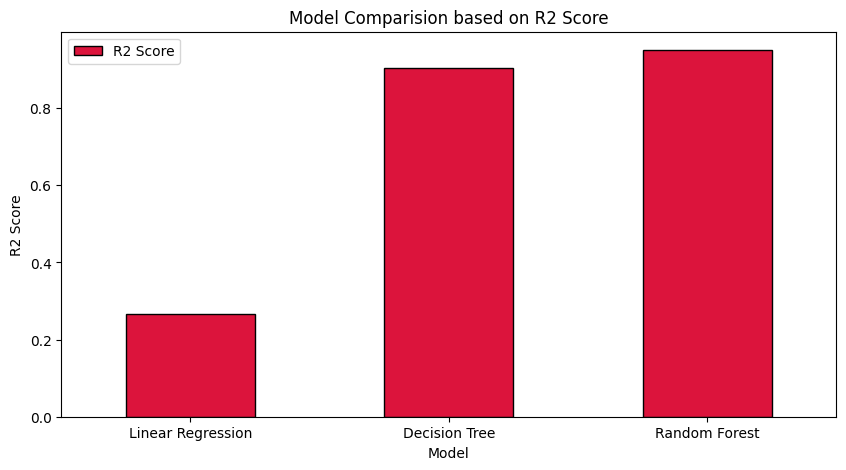

In [16]:
# Model Comparision

model_comparison.set_index('Model')[['R2 Score']].plot(kind='bar', color='crimson', edgecolor='black', figsize=(10,5))
plt.title("Model Comparision based on R2 Score")
plt.ylabel("R2 Score")
plt.xticks(rotation=0)
plt.show()

In [17]:
feature_importance = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importance

Votes                     0.953285
Address_Length            0.012600
Average Cost for two      0.012488
Restaurant_Name_Length    0.009308
Cuisine_Count             0.004311
Price range               0.004279
Has_Online_Delivery       0.002471
Has_Table_Booking         0.001259
dtype: float64

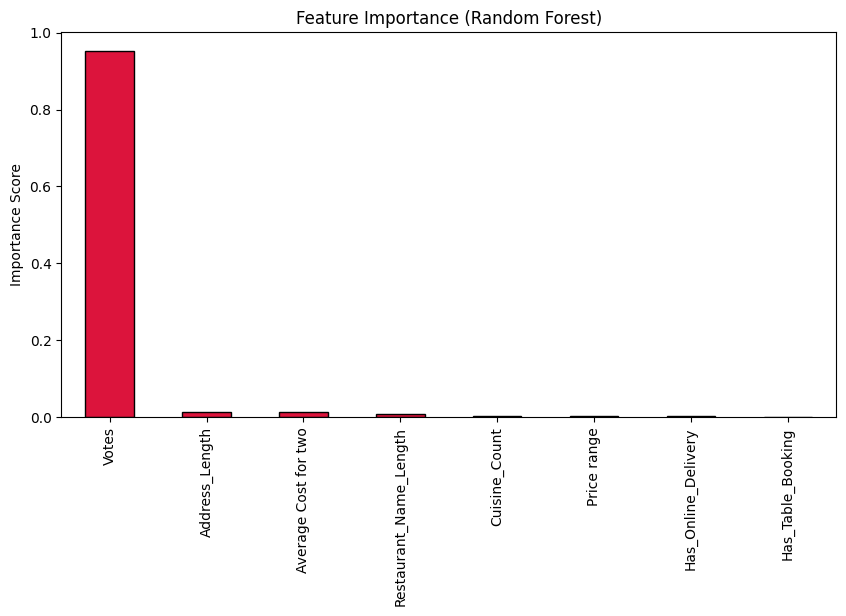

In [18]:
feature_importance.plot(kind='bar', color='crimson', edgecolor='black', figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.xticks(rotation=90)
plt.show()

### Task 2: Customer Preference Analysis

In [19]:
df_cuisine = df.assign(Cuisines=df['Cuisines'].str.split(',')).explode('Cuisines')
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.strip()

In [20]:
# Average Rating per Cuisine

avg_rating_cuisine = (df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False))
avg_rating_cuisine.head(10)

Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

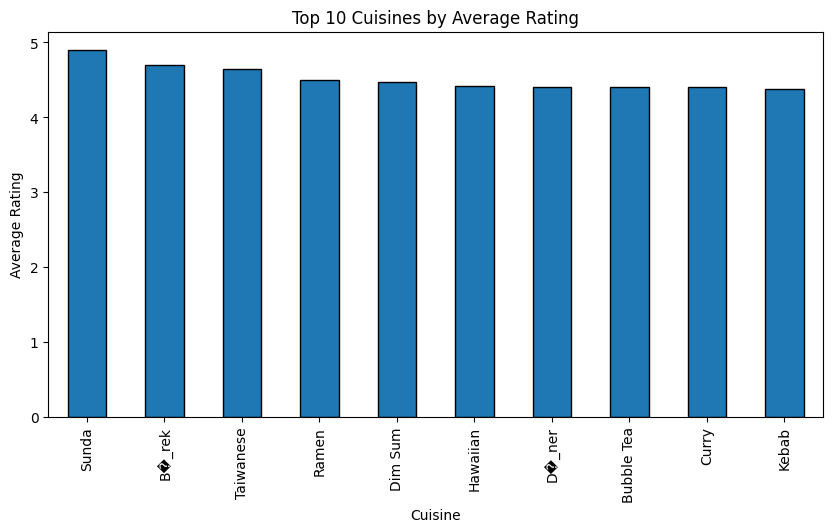

In [21]:
avg_rating_cuisine.head(10).plot(kind='bar', edgecolor='black', figsize=(10,5))
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()

In [22]:
# Total Votes per Cuisine

popular_cuisines = (df_cuisine.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False))
popular_cuisines.head(10)

Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

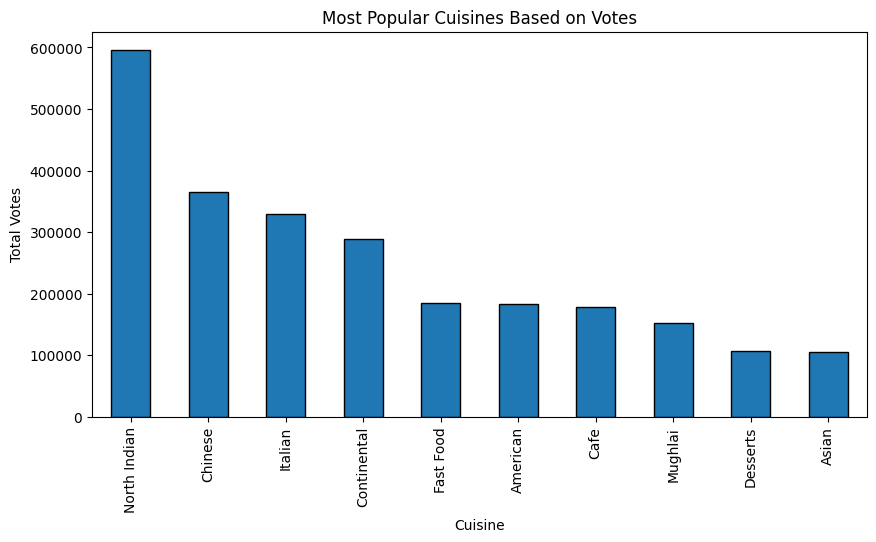

In [23]:
popular_cuisines.head(10).plot(kind='bar', edgecolor='black', figsize=(10,5))
plt.title("Most Popular Cuisines Based on Votes")
plt.ylabel("Total Votes")
plt.xlabel("Cuisine")
plt.show()

In [24]:
cuisine_stats = df_cuisine.groupby('Cuisines').agg({'Aggregate rating': 'mean','Votes': 'sum'})

high_rated_cuisines = cuisine_stats[cuisine_stats['Votes'] > 500].sort_values(by='Aggregate rating', ascending=False)

high_rated_cuisines.head(10)

,Aggregate rating,Votes
Cuisines,,
Sunda,4.900000,5514
B�_rek,4.700000,1305
Ramen,4.500000,1259
Dim Sum,4.466667,1755
Hawaiian,4.412500,8012
Bubble Tea,4.400000,659
Curry,4.400000,2059
Kebab,4.380000,1536
Izgara,4.350000,1166


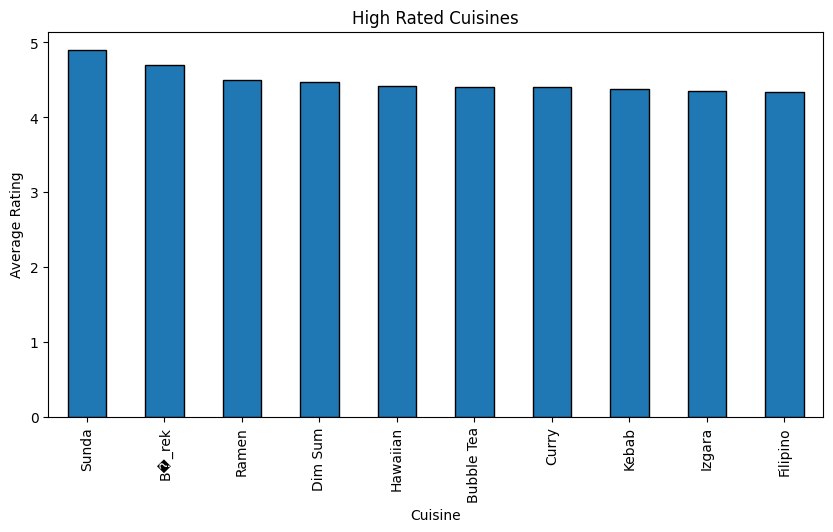

In [25]:
# High Rated Cuisines

high_rated_cuisines.head(10)['Aggregate rating'].plot(kind='bar', edgecolor='black', figsize=(10,5))
plt.title("High Rated Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()

### Task 3: Data Visualization

Text(0, 0.5, 'Frequency')

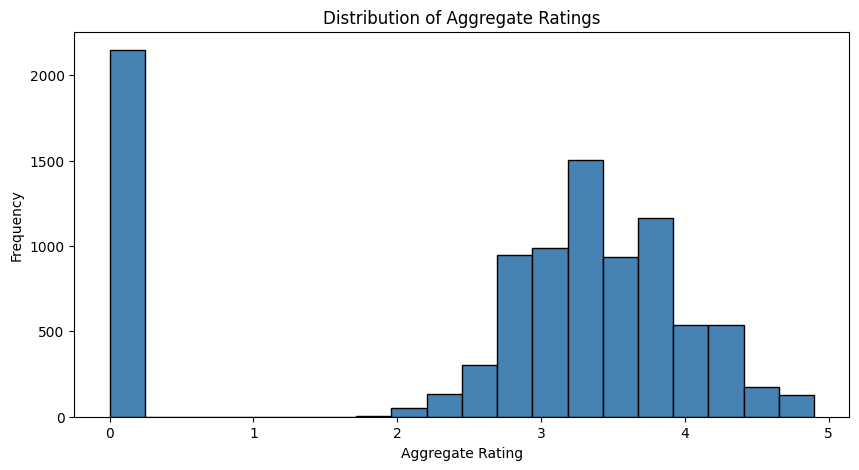

In [26]:
# Distribution of rating
# Histogram of Aggregate Rating

plt.figure(figsize=(10,5))
plt.hist(df['Aggregate rating'], bins=20,  color='steelblue', edgecolor='black')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Count')

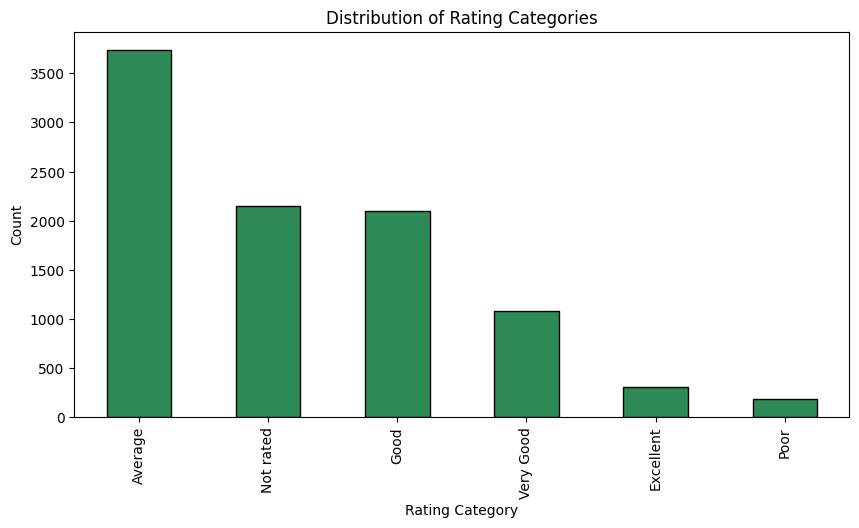

In [27]:
# Bar Plot of Rating Categories

rating_category_counts = df['Rating text'].value_counts()

plt.figure(figsize=(10,5))
rating_category_counts.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title("Distribution of Rating Categories")
plt.xlabel("Rating Category")
plt.ylabel("Count")

In [28]:
# Average Rating by Top 10 City

top_cities = df['City'].value_counts().head(10).index
avg_rating_city = (df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean())

Text(0, 0.5, 'Average Rating')

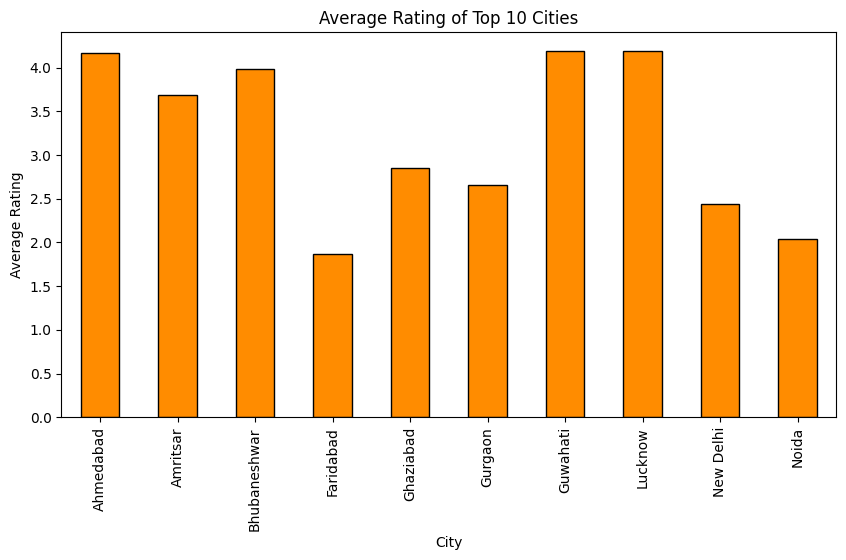

In [29]:
plt.figure(figsize=(10,5))
avg_rating_city.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Average Rating of Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Average Rating")

In [30]:
# Average Rating by Top 10 Cuisine

df_cuisine = df.assign(Cuisines=df['Cuisines'].str.split(',')).explode('Cuisines')

df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.strip()

top_cuisines = df_cuisine['Cuisines'].value_counts().head(10).index

avg_rating_cuisine = (df_cuisine[df_cuisine['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean())

Text(0, 0.5, 'Average Rating')

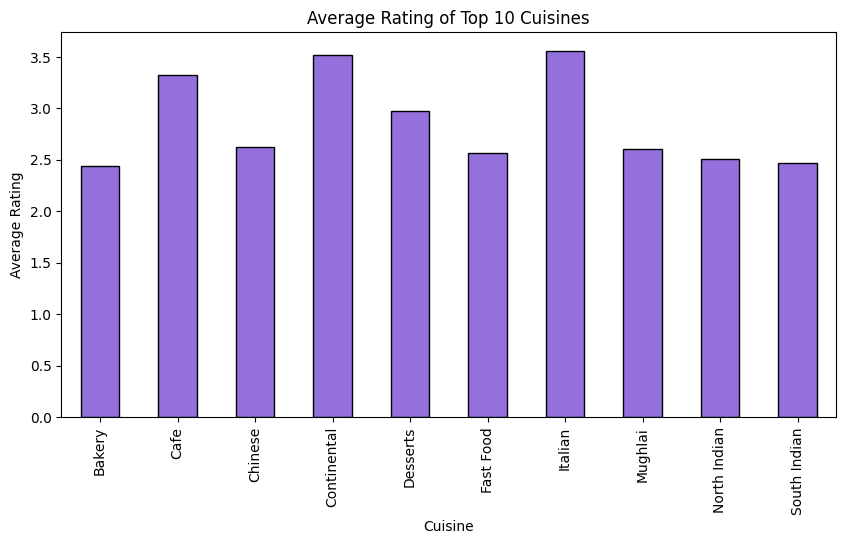

In [31]:
plt.figure(figsize=(10,5))
avg_rating_cuisine.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title("Average Rating of Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")

Text(0, 0.5, 'Aggregate Rating')

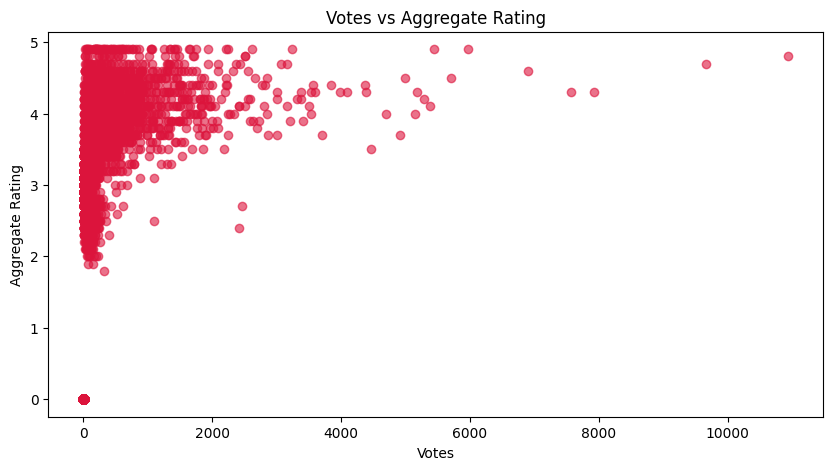

In [32]:
# Votes vs Aggregate Rating

plt.figure(figsize=(10,5))
plt.scatter(df['Votes'], df['Aggregate rating'],color='crimson', alpha=0.6)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")

In [33]:
# Price Range vs Aggregate Rating

avg_rating_price = (df.groupby('Price range')['Aggregate rating'].mean())

Text(0, 0.5, 'Average Rating')

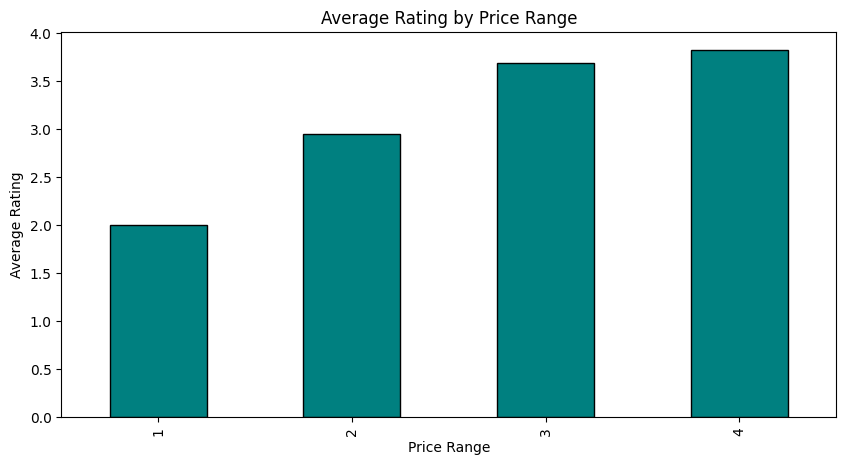

In [34]:
plt.figure(figsize=(10,5))
avg_rating_price.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")